In [95]:
# %pip install matplotlib
# %pip install pandas
# %pip install requests

In [96]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


In [97]:
# this list contatins the years where we want to gather the data
# http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/
# the site only goes up to 2018
list_of_years = [1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
sunspot_latitudes = dict()


In [98]:
def getData(year):
    url = f"http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/DPD{year}.txt"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Could not connect to {url}")
    else:
        content = response.text
        lines = content.splitlines()
        for line in lines:
            if line.startswith("g"):
                row = line.split()
                
                # row[1] = year
                # row[2] = month
                # row[3] = day
                # row[4] = hour
                # row[5] = minute
                # row[6] = second
                # row[7] = sunspot group number
                # row[14] = sunspot latitude

                
                if row[7].isdigit():
                    if float(row[14]) <= 90 and float(row[14]) >= -90:
                        try:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))].append(float(row[14]))
                        except:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))] = [float(row[14])]
                        
    

# total = sum(sunspot_latitudes[1974])
# spots = len(sunspot_latitudes[1974])
# avg = float(total)/spots
# print("average latitude:", round(avg, 2))


In [99]:
for year in list_of_years:
    # sunspot_latitudes[year] = []
    # sunspot_latitudes[datetime(year, 1, 1)]
    getData(year)

print(sunspot_latitudes)



{datetime.datetime(1974, 1, 2, 0, 0): [-5.51], datetime.datetime(1974, 1, 3, 0, 0): [5.17], datetime.datetime(1974, 1, 4, 0, 0): [23.34], datetime.datetime(1974, 1, 5, 0, 0): [30.13], datetime.datetime(1974, 1, 6, 0, 0): [49.43], datetime.datetime(1974, 1, 8, 0, 0): [-17.93, -81.0], datetime.datetime(1974, 1, 9, 0, 0): [-5.03, -68.26], datetime.datetime(1974, 1, 10, 0, 0): [5.42, -59.08, -54.92], datetime.datetime(1974, 1, 11, 0, 0): [25.5, -39.57, -68.07, -36.07], datetime.datetime(1974, 1, 12, 0, 0): [33.31, -32.31, -60.61, -27.95, -84.56], datetime.datetime(1974, 1, 13, 0, 0): [53.22, -14.63, -43.08, -66.3], datetime.datetime(1974, 1, 14, 0, 0): [69.82, 0.27, -28.68, 6.86, -51.32, -70.88, 11.78, -65.38], datetime.datetime(1974, 1, 15, 0, 0): [82.95, 12.17, -16.39, 18.23, -39.36, -60.53, 25.45, -53.43], datetime.datetime(1974, 1, 16, 0, 0): [20.52, -7.97, -31.28, -51.94, 36.03, -45.52], datetime.datetime(1974, 1, 17, 0, 0): [34.03, 5.42, -17.9, -38.53, 50.98], datetime.datetime(1974,

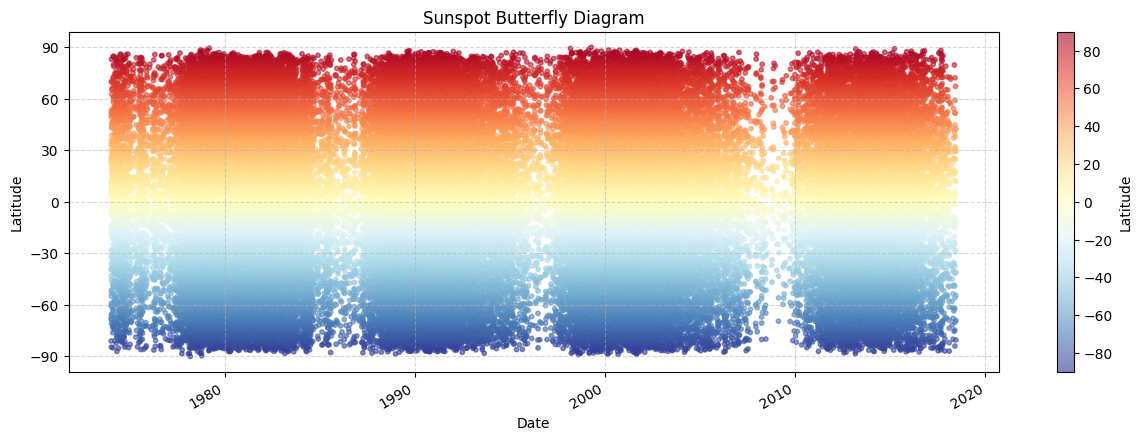

In [101]:
# Initialize lists for plotting
dates = []
latitudes = []

# Loop through the dictionary and collect the data
for date, lat_list in sunspot_latitudes.items():
    dates.extend([date] * len(lat_list))  # Repeat the date for each latitude
    latitudes.extend(lat_list)  # Add all latitudes

# Create scatter plot
plt.figure(figsize=(15, 5))  # Set a wide figure size for better spacing
scatter = plt.scatter(dates, latitudes, c=latitudes, cmap='RdYlBu_r', s=10, alpha=0.6)

# Label the axes
plt.xlabel('Date')
plt.ylabel('Latitude')
plt.title('Sunspot Butterfly Diagram')

# Invert the y-axis to match the top-down format
plt.gca()#.invert_yaxis()

# Add gridlines
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Add color bar for reference
plt.colorbar(label='Latitude')

# Set x-axis major ticks to be every 10 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Major ticks every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Automatically format the x-axis labels
plt.gcf().autofmt_xdate()

# Set y-axis ticks at intervals of 30 degrees
plt.yticks(np.arange(-90, 91, 30))

# Add some padding between the plot and the axes
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()